In [1]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nmresearch.interface.engineering import PulseProgram

In [37]:
c1 = .05
c2 = 0.01
d3 = 4
p1 = 1.1

def round_to_nearest_x(val, base=.020):
    return base * round(val/base)

resolution = 0.001

def wei_times(resolution=.0001):

    t1 = round_to_nearest_x(d3*(1+c1+2*c2) - p1/2,resolution)
    t1p = round_to_nearest_x(2*d3*(1-c1+2*c2) - p1, resolution)
    t2 = round_to_nearest_x(d3*(1-c2) - p1, resolution)
    t3 = round_to_nearest_x(2*d3*(1-c2) - p1, resolution)
    wei16Time = [
        t1,
        t2,
        t3,
        t2,
        t1p,
        t2,
        t3,
        t2,
        2*t1,
        t2,
        t3,
        t2,
        t1p,
        t2,
        t3,
        t2,
        t1,
    ]
    return wei16Time

no_rounding = PulseProgram("0110011023322332", wei_times())
print(no_rounding.avg_ham(tP=p1))

rounding_20ns = PulseProgram("0110011023322332", wei_times(.020))
print(rounding_20ns.avg_ham(tP=p1))

rounding_25ns = PulseProgram("0110011023322332", wei_times(.025))
print(rounding_25ns.avg_ham(tP=p1))

rounding_50ns = PulseProgram("0110011023322332", wei_times(.050))
print(rounding_50ns.avg_ham(tP=p1))

 0.017 rZ + 0.000 Dy + 0.010 Dz
 0.017 rZ + 0.000 Dy + 0.010 Dz
 0.017 rZ + -0.001 Dy + 0.009 Dz
 0.018 rZ + 0.011 Dz


In [29]:
wei16.data_frame()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
X,0,0,-1,0,0,0,1,0,0,0,1,0,0,0,-1,0,0
Y,0,1,0,-1,0,1,0,-1,0,-1,0,1,0,-1,0,1,0
Z,1,0,0,0,-1,0,0,0,1,0,0,0,-1,0,0,0,1


' 0.017 rZ + 0.000 Dy + 0.010 Dz'

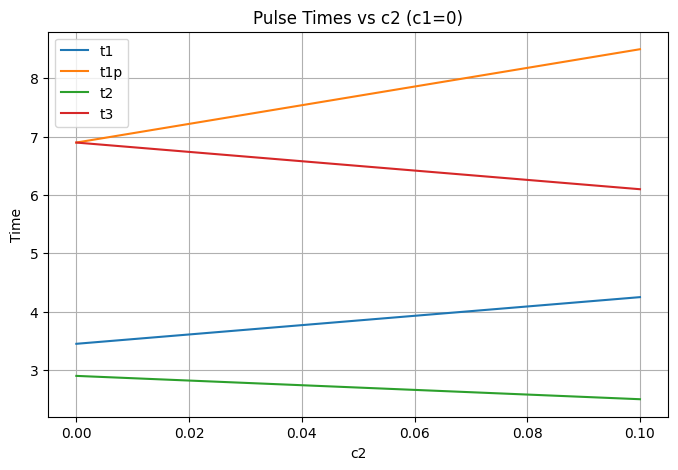

In [5]:
def compute_t1(cnst1, cnst2, d3=4, p1=1.1):
    return d3 * (1 + cnst1 + 2 * cnst2) - p1 / 2

def compute_t1p(cnst1, cnst2, d3=4, p1=1.1):
    return 2 * d3 * (1 - cnst1 + 2 * cnst2) - p1

def compute_t2(cnst1, cnst2, d3=4, p1=1.1):
    return d3 * (1 - cnst2) - p1

def compute_t3(cnst1, cnst2, d3=4, p1=1.1):
    return 2 * d3 * (1 - cnst2) - p1

# Sweep c2 from 0 to 0.1
c2_values = np.linspace(0, 0.1, 100)
c1_val = 0

t1_vals = [compute_t1(c1_val, c2) for c2 in c2_values]
t1p_vals = [compute_t1p(c1_val, c2) for c2 in c2_values]
t2_vals = [compute_t2(c1_val, c2) for c2 in c2_values]
t3_vals = [compute_t3(c1_val, c2) for c2 in c2_values]

plt.figure(figsize=(8, 5))
plt.plot(c2_values, t1_vals, label='t1')
plt.plot(c2_values, t1p_vals, label='t1p')
plt.plot(c2_values, t2_vals, label='t2')
plt.plot(c2_values, t3_vals, label='t3')
plt.xlabel('c2')
plt.ylabel('Time')
plt.title('Pulse Times vs c2 (c1=0)')
plt.legend()
plt.grid(True)
plt.show()

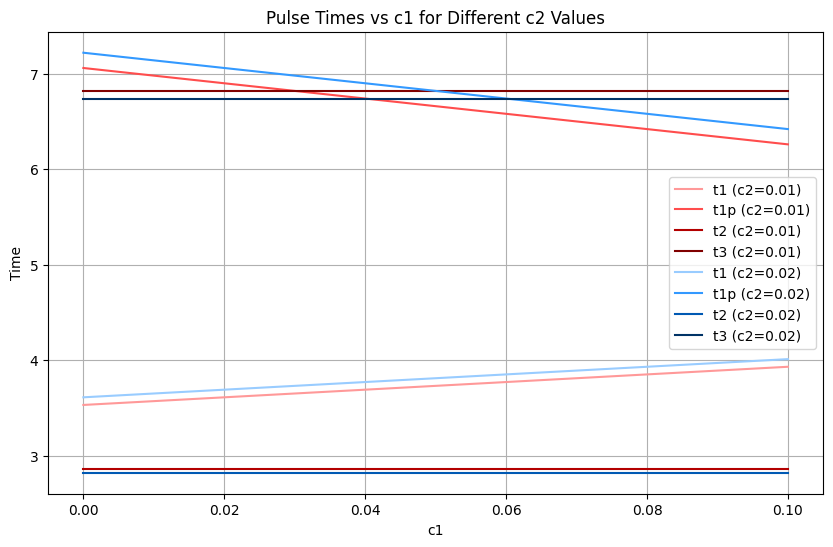

In [6]:
# Sweep c1 from 0 to 0.1
c1_values = np.linspace(0, 0.1, 100)
c2_cases = [0.01, 0.02]

    
# Plot all curves in the same figure with color coding for c2 cases
plt.figure(figsize=(10, 6))

colors = {
    0.01: ['#ff9999', '#ff4d4d', '#b30000', '#800000'],  # light to dark reds
    0.02: ['#99ccff', '#3399ff', '#0059b3', '#003366']   # light to dark blues
}
labels = ['t1', 't1p', 't2', 't3']

for idx, c2_case in enumerate(c2_cases):
    t1_vals = [compute_t1(c1, c2_case) for c1 in c1_values]
    t1p_vals = [compute_t1p(c1, c2_case) for c1 in c1_values]
    t2_vals = [compute_t2(c1, c2_case) for c1 in c1_values]
    t3_vals = [compute_t3(c1, c2_case) for c1 in c1_values]
    curve_vals = [t1_vals, t1p_vals, t2_vals, t3_vals]
    for j, vals in enumerate(curve_vals):
        plt.plot(
            c1_values, vals,
            color=colors[c2_case][j],
            label=f'{labels[j]} (c2={c2_case})'
        )

plt.xlabel('c1')
plt.ylabel('Time')
plt.title('Pulse Times vs c1 for Different c2 Values')
plt.legend()
plt.grid(True)
plt.show()

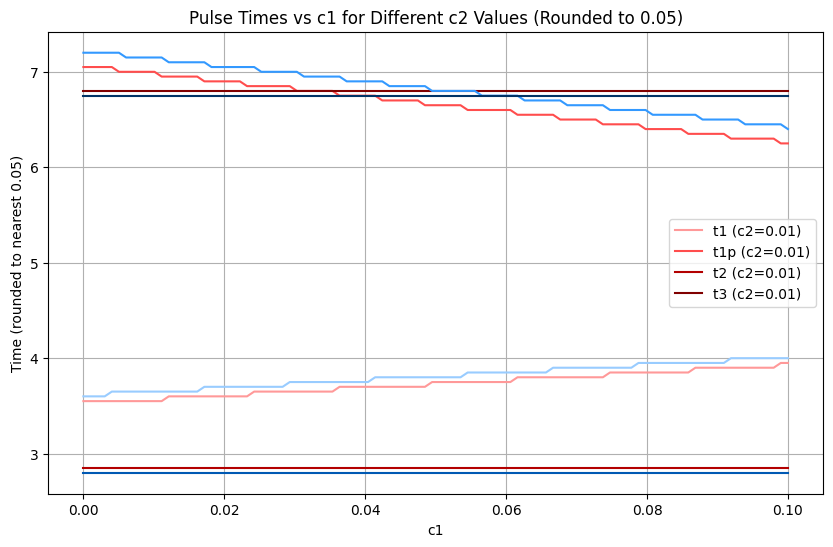

In [21]:
def round_to_nearest_020(x):
    return np.round(x / 0.02) * 0.02

def round_to_nearest_050(x):
    return np.round(x / 0.05) * 0.05


plt.figure(figsize=(10, 6))

for idx, c2_case in enumerate(c2_cases):
    t1_vals = [round_to_nearest_050(compute_t1(c1, c2_case)) for c1 in c1_values]
    t1p_vals = [round_to_nearest_050(compute_t1p(c1, c2_case)) for c1 in c1_values]
    t2_vals = [round_to_nearest_050(compute_t2(c1, c2_case)) for c1 in c1_values]
    t3_vals = [round_to_nearest_050(compute_t3(c1, c2_case)) for c1 in c1_values]
    curve_vals = [t1_vals, t1p_vals, t2_vals, t3_vals]
    for j, vals in enumerate(curve_vals):
        plt.plot(
            c1_values, vals,
            color=colors[c2_case][j],
            label=f'{labels[j]} (c2={c2_case})' if idx == 0 else None
        )

plt.xlabel('c1')
plt.ylabel('Time (rounded to nearest 0.05)')
plt.title('Pulse Times vs c1 for Different c2 Values (Rounded to 0.05)')
plt.legend()
plt.grid(True)
plt.show()

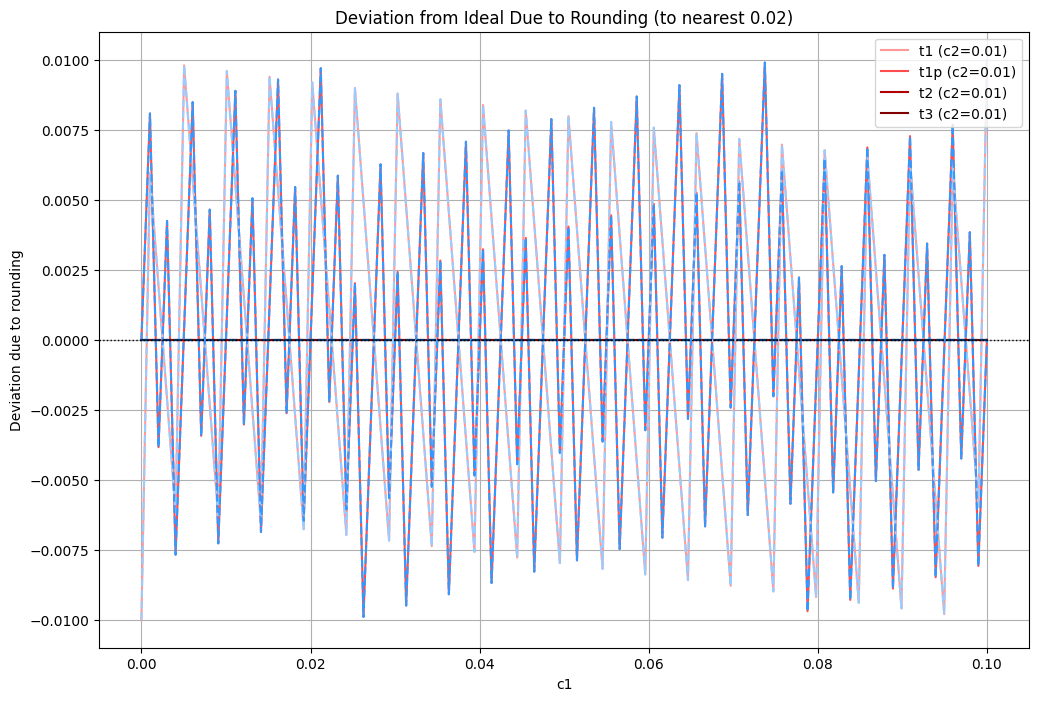

In [22]:
# Compute the deviation from the ideal (unrounded) values due to rounding for each trace
deviations = {}

for c2_case in c2_cases:
    t1_ideal = np.array([compute_t1(c1, c2_case) for c1 in c1_values])
    t1_rounded = np.array([round_to_nearest_020(val) for val in t1_ideal])
    t1_dev = t1_rounded - t1_ideal

    t1p_ideal = np.array([compute_t1p(c1, c2_case) for c1 in c1_values])
    t1p_rounded = np.array([round_to_nearest_020(val) for val in t1p_ideal])
    t1p_dev = t1p_rounded - t1p_ideal

    t2_ideal = np.array([compute_t2(c1, c2_case) for c1 in c1_values])
    t2_rounded = np.array([round_to_nearest_020(val) for val in t2_ideal])
    t2_dev = t2_rounded - t2_ideal

    t3_ideal = np.array([compute_t3(c1, c2_case) for c1 in c1_values])
    t3_rounded = np.array([round_to_nearest_020(val) for val in t3_ideal])
    t3_dev = t3_rounded - t3_ideal

    deviations[c2_case] = [t1_dev, t1p_dev, t2_dev, t3_dev]

plt.figure(figsize=(12, 8))
for idx, c2_case in enumerate(c2_cases):
    for j, dev in enumerate(deviations[c2_case]):
        plt.plot(
            c1_values, dev,
            color=colors[c2_case][j],
            label=f'{labels[j]} (c2={c2_case})' if idx == 0 else None,
            linestyle='--' if idx == 1 else '-'
        )

plt.axhline(0, color='black', linewidth=1, linestyle=':')
plt.xlabel('c1')
plt.ylabel('Deviation due to rounding')
plt.title('Deviation from Ideal Due to Rounding (to nearest 0.02)')
plt.legend()
plt.grid(True)
plt.show()

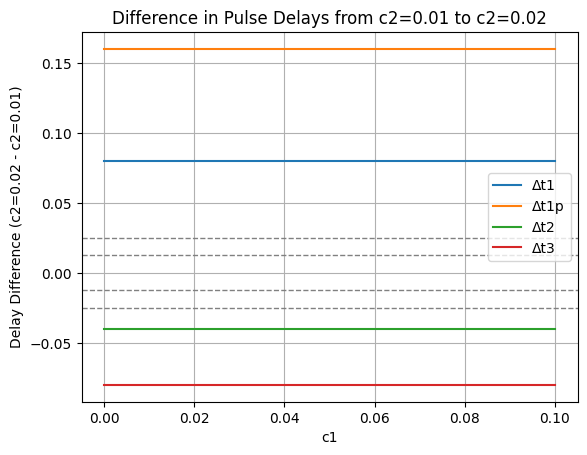

In [17]:
# Compute the difference in delays for each pulse time type when c2 changes from 0.01 to 0.02
t1_diff = np.array([compute_t1(c1, 0.02) - compute_t1(c1, 0.01) for c1 in c1_values])
t1p_diff = np.array([compute_t1p(c1, 0.02) - compute_t1p(c1, 0.01) for c1 in c1_values])
t2_diff = np.array([compute_t2(c1, 0.02) - compute_t2(c1, 0.01) for c1 in c1_values])
t3_diff = np.array([compute_t3(c1, 0.02) - compute_t3(c1, 0.01) for c1 in c1_values])



plt.axhline(0.0125, color='gray', linestyle='--', linewidth=1)
plt.axhline(-0.0125, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.025, color='gray', linestyle='--', linewidth=1)
plt.axhline(-0.025, color='gray', linestyle='--', linewidth=1)

plt.plot(c1_values, t1_diff, label='Δt1')
plt.plot(c1_values, t1p_diff, label='Δt1p')
plt.plot(c1_values, t2_diff, label='Δt2')
plt.plot(c1_values, t3_diff, label='Δt3')
plt.xlabel('c1')
plt.ylabel('Delay Difference (c2=0.02 - c2=0.01)')
plt.title('Difference in Pulse Delays from c2=0.01 to c2=0.02')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
t2_diff

array([-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04,
       -0.04])

In [8]:
t2

2.86

In [9]:
t3

6.82

In [10]:
wei16.avg_ham(tP=1.1)

' 0.017 rZ + 0.000 Dy + 0.010 Dz'

In [11]:
wei16.k_vector()
wei16.k_vector(tP=1.1)

array([[0.        ],
       [0.        ],
       [0.01666667]])

In [12]:
wei16.L_vector()
wei16.L_vector(tP=1.1)

array([[0.33],
       [0.33],
       [0.34]])

In [13]:
wei16.chirality_operator1()

array([0., 0., 0.])

In [14]:
wei16.parity_operator1()

array([0., 0., 0.])